Установки всего нужного

In [ ]:
pip install transformers

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.3 MB/s eta 0:00:00


In [ ]:
pip install sentencepiece

In [ ]:
pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import logging
import os
import sys
import warnings
from dataclasses import dataclass, field
from typing import Optional

import datasets
import evaluate
import numpy as np
from datasets import ClassLabel, load_dataset

import transformers
from transformers import (
    AutoConfig,
    AutoModelForTokenClassification,
    AutoTokenizer,
    DataCollatorForTokenClassification,
    HfArgumentParser,
    PretrainedConfig,
    PreTrainedTokenizerFast,
    Trainer,
    TrainingArguments,
    set_seed,
)
from transformers.trainer_utils import get_last_checkpoint
from transformers.utils import check_min_version, send_example_telemetry
from transformers.utils.versions import require_version

In [ ]:
pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=be697711d3f1da2b914739eb4141181b663e9376a3dd909949232615127f11b9
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


# Эксперименты

In [ ]:
!python ner.py \
  --model_name_or_path Babelscape/wikineural-multilingual-ner \
  --train_file /content/ner_dataset_train.pkl \
  --validation_file /content/ner_dataset_eval.pkl \
  --text_column_name tokens \
  --label_column_name ner_tags \
  --task_name ner \
  --max_length 128 \
  --per_device_train_batch_size 32 \
  --learning_rate 2e-5 \
  --num_train_epochs 3 \
  --output_dir /content/our_output/

2024-03-24 12:54:03.054572: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 12:54:03.054624: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 12:54:03.056270: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-24 12:54:04.961251: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
03/24/2024 12:54:08 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

Generating train split: 1658 examples [00:00, 38754.77 examples/s]
Generatin

In [ ]:
!python ner.py \
  --model_name_or_path fhswf/bert_de_ner \
  --train_file /content/ner_dataset_train.pkl \
  --validation_file /content/ner_dataset_eval.pkl \
  --text_column_name tokens \
  --label_column_name ner_tags \
  --task_name ner \
  --max_length 128 \
  --per_device_train_batch_size 32 \
  --learning_rate 2e-5 \
  --num_train_epochs 3 \
  --output_dir /content/our_output/

2024-03-24 12:58:26.342864: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 12:58:26.342916: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 12:58:26.344114: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-24 12:58:27.518886: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
03/24/2024 12:58:32 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

config.json: 100% 1.53k/1.53k [00:00<00:00, 5.65MB/s]
loading configuration 

In [ ]:
!python ner.py \
  --model_name_or_path Babelscape/wikineural-multilingual-ner \
  --train_file /content/ner_dataset_train_lower.pkl \
  --validation_file /content/ner_dataset_eval_lower.pkl \
  --text_column_name tokens \
  --label_column_name ner_tags \
  --task_name ner \
  --max_length 128 \
  --per_device_train_batch_size 32 \
  --learning_rate 2e-5 \
  --num_train_epochs 3 \
  --output_dir /content/our_output/

2024-03-24 13:54:11.523434: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 13:54:11.523519: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 13:54:11.524852: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-24 13:54:12.665138: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
03/24/2024 13:54:16 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

Generating train split: 1658 examples [00:00, 58759.74 examples/s]
Generatin

In [ ]:
!python ner.py \
  --model_name_or_path fhswf/bert_de_ner \
  --train_file /content/ner_dataset_train_lower.pkl \
  --validation_file /content/ner_dataset_eval_lower.pkl \
  --text_column_name tokens \
  --label_column_name ner_tags \
  --task_name ner \
  --max_length 128 \
  --per_device_train_batch_size 32 \
  --learning_rate 2e-5 \
  --num_train_epochs 3 \
  --output_dir /content/our_output/

2024-03-24 13:57:13.356194: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 13:57:13.356269: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 13:57:13.357580: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-24 13:57:14.479126: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
03/24/2024 13:57:17 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

loading configuration file config.json from cache at /root/.cache/huggingfac

#Графики

In [3]:
import matplotlib.pyplot as plt

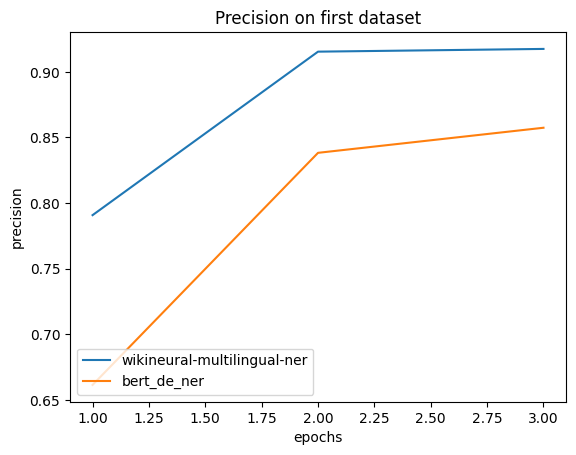

In [6]:
plt.plot([1,2,3], [0.7908611599297012, 0.9153846153846154, 0.9174664107485605], [1,2,3], [0.6615384615384615, 0.8383233532934131, 0.8574257425742574])
plt.title('Precision on first dataset')
plt.xlabel('epochs')
plt.ylabel('precision')
plt.legend(["wikineural-multilingual-ner", "bert_de_ner"], loc="lower left")
plt.show()

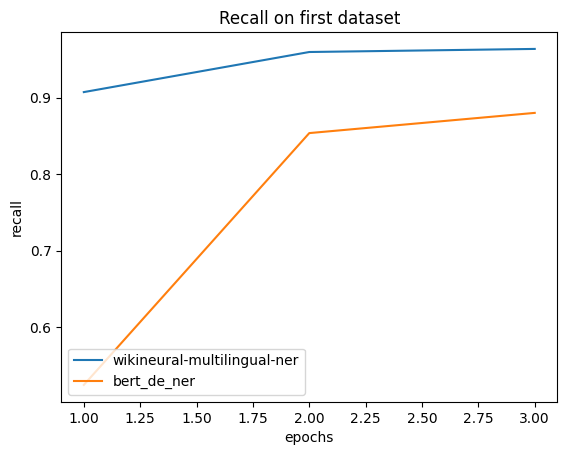

In [7]:
plt.plot([1,2,3], [0.907258064516129, 0.9596774193548387, 0.9637096774193549], [1,2,3], [0.524390243902439, 0.8536585365853658, 0.8800813008130082])
plt.title('Recall on first dataset')
plt.xlabel('epochs')
plt.ylabel('recall')
plt.legend(["wikineural-multilingual-ner", "bert_de_ner"], loc="lower left")
plt.show()

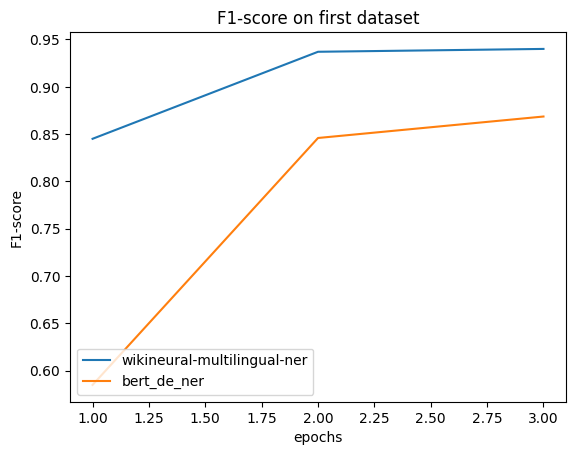

In [8]:
plt.plot([1,2,3], [0.8450704225352113, 0.9370078740157479, 0.9400196656833825], [1,2,3], [0.5850340136054422, 0.8459214501510574, 0.8686058174523571])
plt.title('F1-score on first dataset')
plt.xlabel('epochs')
plt.ylabel('F1-score')
plt.legend(["wikineural-multilingual-ner", "bert_de_ner"], loc="lower left")
plt.show()

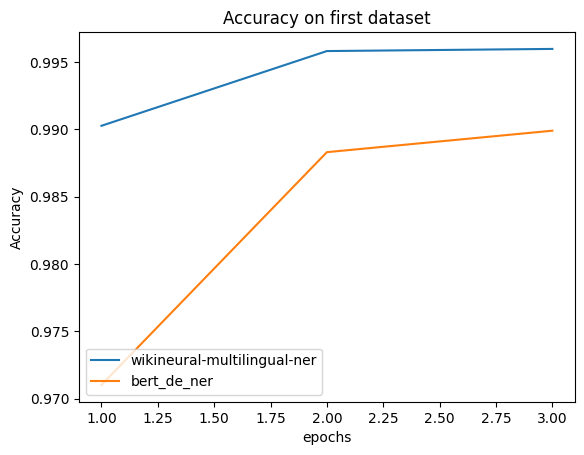

In [9]:
plt.plot([1,2,3], [0.9902535657686212, 0.9958003169572108, 0.995958795562599], [1,2,3], [0.9710214154923971, 0.9882971101026988, 0.989889340020699])
plt.title('Accuracy on first dataset')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(["wikineural-multilingual-ner", "bert_de_ner"], loc="lower left")
plt.show()